# Basic definitions. Centrality Measures. Feature engineering.

In this notebook we introduce some basics of networkx library. More in-depth tutorial can be found [here](https://networkx.github.io/documentation/stable/tutorial.html)

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [2]:
import stellargraph as sg
import networkx as nx

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

### Networkx basics

In [4]:
# creating an empty graph
G = nx.Graph(name="Friendship")

In [5]:
# adding one node
G.add_node("John")

In [6]:
# adding several nodes as a list
G.add_nodes_from(["Liz", "Katie", "Sam", "Bob", "Tom", "Mary"])

In [7]:
# adding an edge
G.add_edge("Liz","John")

In [8]:
# adding a list of edges:
G.add_edges_from([("Liz","John"),("Katie","Sam"), ("Bob","Katie"), ("Katie", "Tom"), ("Liz", "Tom")])

In [9]:
print(nx.info(G))

Name: Friendship
Type: Graph
Number of nodes: 7
Number of edges: 5
Average degree:   1.4286


In [10]:
print(G.nodes())
print(G.edges())

['John', 'Liz', 'Katie', 'Sam', 'Bob', 'Tom', 'Mary']
[('John', 'Liz'), ('Liz', 'Tom'), ('Katie', 'Sam'), ('Katie', 'Bob'), ('Katie', 'Tom')]


In [11]:
print(nx.info(G))

Name: Friendship
Type: Graph
Number of nodes: 7
Number of edges: 5
Average degree:   1.4286


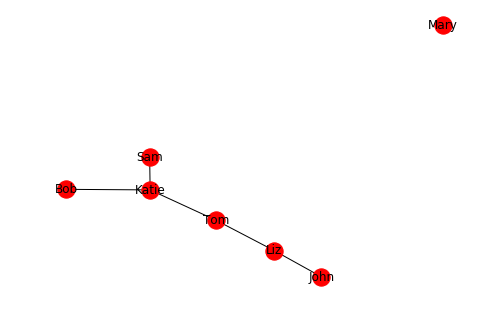

In [13]:
nx.draw(G, with_labels = True)

__Question: what will happen if we add edges with the nodes that do not exist in the graph?__

In [14]:
G.add_edges_from([("A","B"), (1,2), ("Bob","Santa")])

In [14]:
# Answer

In [15]:
# removing an edge
print(G.edges())
G.remove_edge(1,2)
print(G.edges()) # edge is removed
print(G.nodes()) # but nodes are still there

[('John', 'Liz'), ('Liz', 'Tom'), ('Katie', 'Sam'), ('Katie', 'Bob'), ('Katie', 'Tom'), ('Bob', 'Santa'), ('A', 'B'), (1, 2)]
[('John', 'Liz'), ('Liz', 'Tom'), ('Katie', 'Sam'), ('Katie', 'Bob'), ('Katie', 'Tom'), ('Bob', 'Santa'), ('A', 'B')]
['John', 'Liz', 'Katie', 'Sam', 'Bob', 'Tom', 'Mary', 'A', 'B', 1, 2, 'Santa']


In [16]:
G.remove_nodes_from([1,2])

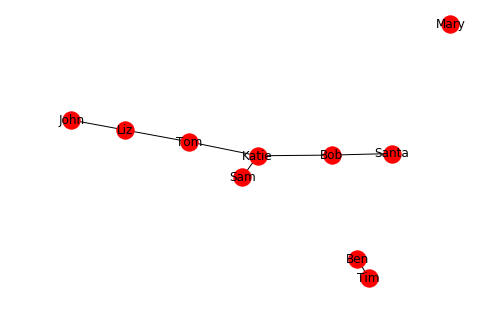

In [17]:
# Relabeling nodes
correction = {"A":"Tim", "B":"Ben"}

H = nx.relabel_nodes(G, correction)
nx.draw(H, with_labels = True)

Name: Friendship
Type: DiGraph
Number of nodes: 10
Number of edges: 14
Average in degree:   1.4000
Average out degree:   1.4000


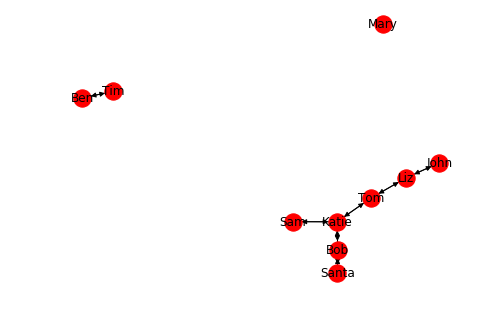

In [18]:
# Changing the graph to directed
H_directed = H.to_directed()
print(nx.info(H_directed))
nx.draw(H_directed, with_labels = True)

In [19]:
# connected components and isolates
nx.number_connected_components(H)

3

In [20]:
nx.connected_components(H) # displays an object

<generator object connected_components at 0x1a261ace60>

In [21]:
list(nx.connected_components(H)) # transform it to the list for the results

[{'Bob', 'John', 'Katie', 'Liz', 'Sam', 'Santa', 'Tom'},
 {'Mary'},
 {'Ben', 'Tim'}]

In [22]:
list(nx.isolates(H))

['Mary']

### Creating graph from diffrent formats

Nodes: 
[0, 1, 2]
Edges: 
[(0, 1), (0, 2), (1, 2)]


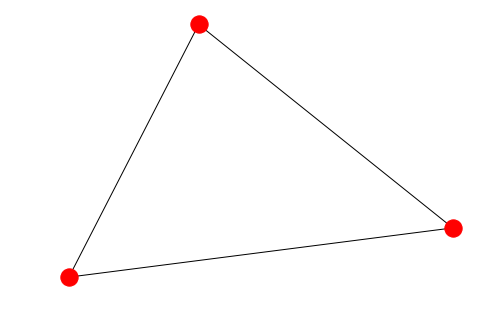

In [23]:
adjacency_matrix = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]])
G = nx.from_numpy_matrix(adjacency_matrix)
print("Nodes: ")
print(G.nodes())
print("Edges: ")
print(G.edges())
nx.draw(G)

In [24]:
adjacency_list = {'A':['B','C','D', 'F', 'G'], 
                  'B': ['A', 'G'], 
                  'D': ['A', 'C'], 
                  'G': ['C','F']
                 }

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 11
Average in degree:   1.8333
Average out degree:   1.8333


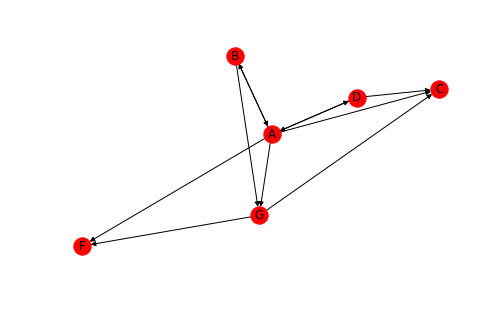

In [25]:
G = nx.from_dict_of_lists(adjacency_list, create_using=nx.DiGraph())
print(nx.info(G))
nx.draw(G, with_labels=True)

### Loading from data

#### Data description

>Network of coappearances of characters in the Game of Thrones series, by George R. R. Martin, and in particular coappearances in the book "A Storm of Swords." Nodes are unique characters, and edges are weighted by the number of times the two characters' names appeared within 15 words of each other in the text.

Donwload data from http://www.macalester.edu/~abeverid/data/stormofswords.csv

In [26]:
data_dir = "../data/GoT"
data_location = os.path.expanduser(os.path.join(data_dir, "stormofswords.csv"))

In [27]:
dt = pd.read_csv(data_location)

In [28]:
dt.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


In [29]:
dt.shape

(352, 3)

In [30]:
G = nx.from_pandas_edgelist(dt, source='Source', target='Target')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 352
Average degree:   6.5794


In [31]:
nx.number_connected_components(G)

1

### Plotting

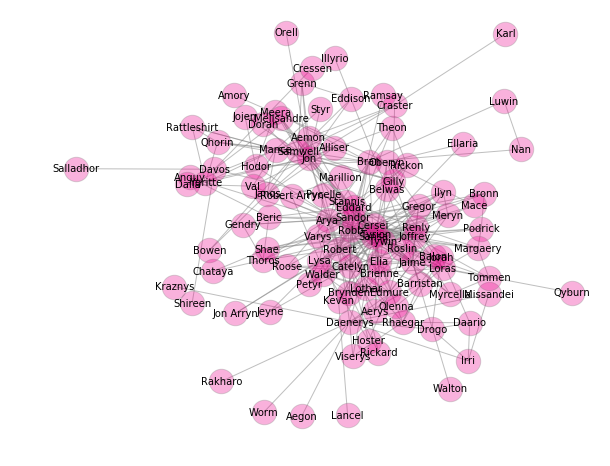

In [32]:
# More sophisticated graph drawing

plt.figure(figsize=(10,8)) # change the size of the figure
pos = nx.fruchterman_reingold_layout(G, iterations=10) # specify layout
# nodes
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#ec008c', edgecolors='grey', alpha=0.3)

# edges
nx.draw_networkx_edges(G, pos,
                       width=1, alpha=0.5, edge_color='grey')

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

### Centrality measures

In [33]:
degree_centrality = nx.degree_centrality(G) 

In [34]:
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [35]:
degree_centrality_sorted[:5]

[('Tyrion', 0.33962264150943394),
 ('Jon', 0.24528301886792453),
 ('Sansa', 0.24528301886792453),
 ('Robb', 0.2358490566037736),
 ('Jaime', 0.22641509433962265)]

In [36]:
node_size = [v * 3000 for v in degree_centrality.values()]

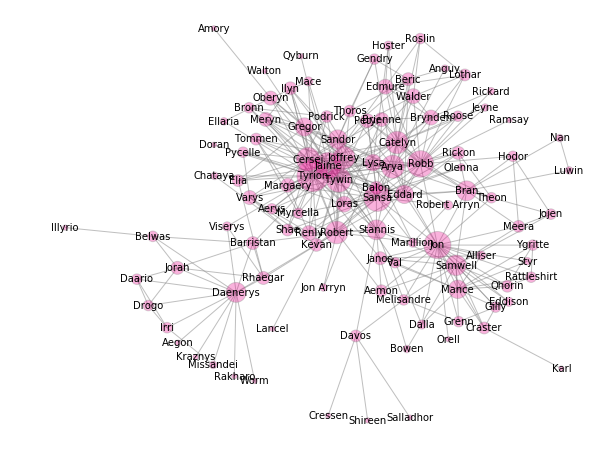

In [37]:
plt.figure(figsize=(10,8)) # change the size of the figure
pos = nx.kamada_kawai_layout(G) # specify layout
# nodes
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='#ec008c', edgecolors='grey', alpha=0.3)

# edges
nx.draw_networkx_edges(G, pos,
                       width=1, alpha=0.5, edge_color='grey')

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [38]:
betweenness = nx.betweenness_centrality(G)
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
betweenness_sorted[:5]

[('Jon', 0.22996466368473173),
 ('Robert', 0.2094523840293194),
 ('Tyrion', 0.19791284320277353),
 ('Daenerys', 0.15720345212054956),
 ('Robb', 0.1269644713830151)]

In [39]:
closeness = nx.closeness_centrality(G)
closeness_sorted = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
closeness_sorted[:5]

[('Tyrion', 0.5120772946859904),
 ('Sansa', 0.5096153846153846),
 ('Robert', 0.5),
 ('Robb', 0.48847926267281105),
 ('Arya', 0.48623853211009177)]

In [40]:
eigenvector = nx.eigenvector_centrality(G)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
eigenvector_sorted[:5]

[('Tyrion', 0.33663766254996313),
 ('Sansa', 0.27878188816602195),
 ('Jaime', 0.27366303653172797),
 ('Cersei', 0.24644869607730555),
 ('Robb', 0.2448454761557984)]

### Cora dataset

The dataset is the citation network Cora.

It can be downloaded by clicking [here](https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz)

The following is the description of the dataset from the publisher,

> The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words. The README file in the dataset provides more details. 

Download and unzip the cora.tgz file to a location on your computer. 

We assume that the dataset is stored in the directory

`../data/cora/`

where the files `cora.cites` and `cora.content` can be located.

In [41]:
data_dir = "../data/cora"

In [42]:
# load edgelist data
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), header=None, names=["source", "target"], sep="\t")
edgelist["label"] = "cites"

In [43]:
edgelist.head()

,source,target,label
0,35,1033,cites
1,35,103482,cites
2,35,103515,cites
3,35,1050679,cites
4,35,1103960,cites


In [44]:
g_nx = nx.from_pandas_edgelist(edgelist)

In [45]:
print(nx.info(g_nx))

Name: 
Type: Graph
Number of nodes: 2708
Number of edges: 5278
Average degree:   3.8981


In [48]:
# Processing cora data attributes
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  ['paper_id'] + feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), header=None, names=column_names, sep="\t")

In [49]:
node_data.head()

,paper_id,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [50]:
values = { row.tolist()[0]: row.tolist()[-1] for _, row in node_data.iterrows()}
nx.set_node_attributes(g_nx, values, 'subject') # assig attributes to nodes

In [51]:
list(g_nx.nodes(data=True))[:5] # print first few lines of the nodes with their attributes

[(35, {'subject': 'Genetic_Algorithms'}),
 (1033, {'subject': 'Genetic_Algorithms'}),
 (103482, {'subject': 'Neural_Networks'}),
 (103515, {'subject': 'Genetic_Algorithms'}),
 (1050679, {'subject': 'Genetic_Algorithms'})]

In [52]:
nx.number_connected_components(g_nx)

78

In [53]:
# Select the largest connected component
g_nx_ccs = (g_nx.subgraph(c).copy() for c in nx.connected_components(g_nx))
g_nx = max(g_nx_ccs, key=len)
print("Largest subgraph statistics: {} nodes, {} edges".format(
    g_nx.number_of_nodes(), g_nx.number_of_edges()))

Largest subgraph statistics: 2485 nodes, 5069 edges


### Graph filtering

In [ ]:
# Create a subgraph of papers that belong to a class: "Rule learning" and plot it.

In [54]:
selected_nodes = [n for n,v in g_nx.nodes(data=True) if v['subject'] == 'Rule_Learning']
subgraph_rl = g_nx.subgraph(selected_nodes)

In [55]:
print(nx.info(subgraph_rl))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 186
Average degree:   2.8397


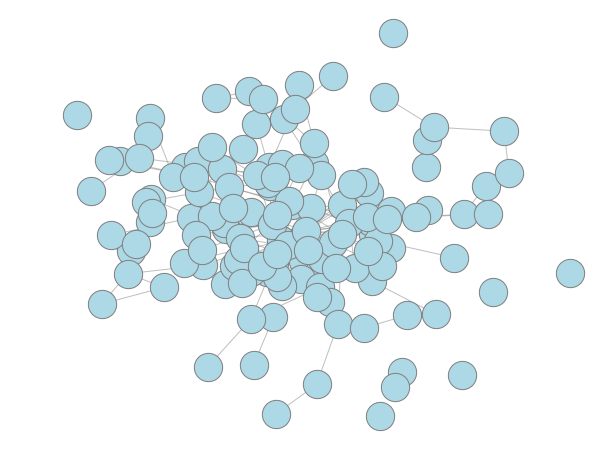

In [56]:
plt.figure(figsize=(10,8)) # change the size of the figure
pos = nx.fruchterman_reingold_layout(subgraph_rl, iterations=10) # specify layout
# nodes
nx.draw_networkx_nodes(subgraph_rl, pos, node_size=800, node_color='lightblue', edgecolors='grey')

# edges
nx.draw_networkx_edges(subgraph_rl, pos,
                       width=1, alpha=0.5, edge_color='grey')

plt.axis('off')
plt.show()

### Exercise: output now subgraph for any other paper subject. Optional: try to change the size of the nodes based on a degree or any other metric

### Logistic regression on Cora with the provided features

In [57]:
# filter the node data that is in the largest connected component
node_data_gcc = node_data[node_data.paper_id.isin(list(g_nx.nodes))]
print(node_data_gcc.shape)

(2485, 1435)


In [58]:
node_data_gcc.head()

,paper_id,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [59]:
# X are the features that are calcualted from the graph
X = node_data_gcc.drop(['paper_id','subject'], axis=1).values 
# y holds the corresponding target values
y = node_data_gcc['subject'].values

### Data Splitting

We split the data into train and test sets. 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=140, test_size=None, random_state=42)
print("Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Array shapes:
 X_train = (140, 1433)
 y_train = (140,)
 X_test = (2345, 1433)
 y_test = (2345,)


### Classifier Training

We train a Logistic Regression classifier on the training data. 

In [61]:
clf = LogisticRegressionCV(Cs=10, 
                           cv=5, 
                           verbose=False,
                           multi_class='multinomial', 
                           max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=False)

In [62]:
print("score on X_train {}".format(clf.score(X_train, y_train)))
print("score on X_test {}".format(clf.score(X_test, y_test)))

score on X_train 1.0
score on X_test 0.5829424307036247


In [63]:
y_pred = clf.predict(X_test)

In [64]:
y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actual, y_pred)

In [65]:
df_confusion

Predicted,Case_Based,Genetic_Algorithms,Neural_Networks,Probabilistic_Methods,Reinforcement_Learning,Rule_Learning,Theory
Actual,,,,,,,
Case_Based,104,30,77,6,1,5,48
Genetic_Algorithms,1,304,49,0,1,1,16
Neural_Networks,3,53,559,27,0,4,41
Probabilistic_Methods,8,24,147,145,0,1,38
Reinforcement_Learning,2,62,59,6,41,2,33
Rule_Learning,3,33,22,8,0,24,31
Theory,4,35,68,15,1,13,190


In [66]:
from collections import Counter
Counter(y_test)

Counter({'Theory': 326,
         'Neural_Networks': 687,
         'Case_Based': 271,
         'Probabilistic_Methods': 363,
         'Genetic_Algorithms': 372,
         'Rule_Learning': 121,
         'Reinforcement_Learning': 205})

__Question: What class is the easiest/hardest to predict?__

### Logistic regression on Cora with centrality measures

In [67]:
# Calculate centrality measures
nx.set_node_attributes(g_nx, nx.degree_centrality(g_nx), 'degree_centrality')
nx.set_node_attributes(g_nx, nx.betweenness_centrality(g_nx), 'betweenness')
nx.set_node_attributes(g_nx, nx.closeness_centrality(g_nx), 'closeness')
nx.set_node_attributes(g_nx, nx.eigenvector_centrality(g_nx), 'eigenvector')

In [68]:
list(g_nx.nodes(data=True))[:5]

[(35,
  {'subject': 'Genetic_Algorithms',
   'degree_centrality': 0.06763285024154589,
   'betweenness': 0.27611427872076444,
   'closeness': 0.24276778733385457,
   'eigenvector': 0.6542996956637289}),
 (1033,
  {'subject': 'Genetic_Algorithms',
   'degree_centrality': 0.002012882447665056,
   'betweenness': 0.0028857888202260254,
   'closeness': 0.19802295918367346,
   'eigenvector': 0.052206895028918746}),
 (103482,
  {'subject': 'Neural_Networks',
   'degree_centrality': 0.0024154589371980675,
   'betweenness': 0.005356636060064196,
   'closeness': 0.20295775798676363,
   'eigenvector': 0.05028077460083125}),
 (103515,
  {'subject': 'Genetic_Algorithms',
   'degree_centrality': 0.004428341384863124,
   'betweenness': 0.001996123531420901,
   'closeness': 0.19670573329109914,
   'eigenvector': 0.07250762020256239}),
 (1050679,
  {'subject': 'Genetic_Algorithms',
   'degree_centrality': 0.001610305958132045,
   'betweenness': 0.02859663611453852,
   'closeness': 0.2259619758027836,
 

In [69]:
graph_features = pd.DataFrame.from_dict(dict(g_nx.nodes(data=True)), orient='index')

In [70]:
graph_features.head()

,subject,degree_centrality,betweenness,closeness,eigenvector
35,Genetic_Algorithms,0.067633,0.276114,0.242768,0.654300
40,Genetic_Algorithms,0.001610,0.001708,0.172201,0.007881
114,Reinforcement_Learning,0.016908,0.016728,0.206141,0.011288
117,Reinforcement_Learning,0.006844,0.009032,0.203790,0.004007
128,Reinforcement_Learning,0.003221,0.001668,0.202528,0.006031


In [71]:
# X are the features that are calcualted from the graph
X = graph_features.drop(['subject'], axis=1).values 
# y holds the corresponding target values
y = graph_features['subject'].values

### Data Splitting

We split the data into train and test sets. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=140, test_size=None, random_state=42)
print("Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Array shapes:
 X_train = (140, 4)
 y_train = (140,)
 X_test = (2345, 4)
 y_test = (2345,)


### Classifier Training

We train a Logistic Regression classifier on the training data. 

In [73]:
clf = LogisticRegressionCV(Cs=10, 
                           cv=5, 
                           verbose=False,
                           multi_class='multinomial', 
                           max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=False)

In [74]:
print("score on X_train {}".format(clf.score(X_train, y_train)))
print("score on X_test {}".format(clf.score(X_test, y_test)))

score on X_train 0.30714285714285716
score on X_test 0.3420042643923241


In [75]:
y_pred = clf.predict(X_test)

In [76]:
y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actual, y_pred)

In [77]:
df_confusion

Predicted,Genetic_Algorithms,Neural_Networks,Theory
Actual,,,
Case_Based,9,255,5
Genetic_Algorithms,174,210,0
Neural_Networks,27,611,49
Probabilistic_Methods,0,351,8
Reinforcement_Learning,82,114,7
Rule_Learning,0,119,2
Theory,8,297,17
